In [1]:
%matplotlib inline

In [1]:
import os

os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"

In [2]:
import tensorflow as tf

2025-01-02 20:25:07.747275: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
from tensorflow.keras.layers import Dense, Input, Flatten, Dropout, Concatenate
from tensorflow.keras.datasets.fashion_mnist import load_data
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.utils import plot_model

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
# load_data() dataset splits the dataset to training and testing

In [5]:
data = load_data()
((attr_train, tgt_train), (attr_test, tgt_test)) = data

4422102/4422102 [==============================] - 2s 0us/step


In [6]:
attr_test.shape

(10000, 28, 28)

In [7]:
attr_train.shape

(60000, 28, 28)

In [8]:
attr_train.reshape(60000, -1).shape

(60000, 784)

In [9]:
input_layer = Input((28, 28))

In [10]:
input_layer

<KerasTensor: shape=(None, 28, 28) dtype=float32 (created by layer 'input_1')>

In [11]:
flatten_layer = Flatten()(input_layer)

In [12]:
flatten_layer

<KerasTensor: shape=(None, 784) dtype=float32 (created by layer 'flatten')>

In [13]:
layer1 = Dense(64, activation='relu')(flatten_layer)
layer2 = Dense(128, activation='relu')(layer1)
layer3 = Dense(64, activation='relu')(layer2)
output_layer = Dense(10, activation='softmax')(layer3)

In [14]:
output_layer

<KerasTensor: shape=(None, 10) dtype=float32 (created by layer 'dense_3')>

In [15]:
model = Model(inputs=input_layer, outputs=output_layer)

In [16]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 128)               8320      
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 10)                650       
                                                                 
Total params: 67,466
Trainable params: 67,466
Non-trainable p

In [19]:
block_beginning = Dense(20, activation='relu')(flatten_layer)

block_a1 = Dense(11, activation='relu')(block_beginning)
block_a2 = Dense(20, activation='relu')(block_a1)
block_a3 = Dense(11, activation='relu')(block_a2)

block_b = Dense(20, activation='relu')(block_beginning)
block_c = Dense(30, activation='relu')(block_beginning)

block_end = Concatenate()([block_a3, block_b, block_c])

In [20]:
block = Model(inputs=block_beginning, outputs=block_end)

In [21]:
block.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 20)]         0           []                               
                                                                                                  
 dense_5 (Dense)                (None, 11)           231         ['input_2[0][0]']                
                                                                                                  
 dense_6 (Dense)                (None, 20)           240         ['dense_5[1][0]']                
                                                                                                  
 dense_7 (Dense)                (None, 11)           231         ['dense_6[1][0]']                
                                                                                            

In [22]:
plot_model(model)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [23]:
np.array([-1, -1], dtype=int)

array([-1, -1])

In [24]:
final_layer = Dense(20, activation='relu')(block.output)

In [25]:
Model(inputs=block.input, outputs=final_layer).summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 20)]         0           []                               
                                                                                                  
 dense_5 (Dense)                (None, 11)           231         ['input_2[0][0]']                
                                                                                                  
 dense_6 (Dense)                (None, 20)           240         ['dense_5[1][0]']                
                                                                                                  
 dense_7 (Dense)                (None, 11)           231         ['dense_6[1][0]']                
                                                                                            

In [26]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 128)               8320      
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 10)                650       
                                                                 
Total params: 67,466
Trainable params: 67,466
Non-trainable p

In [27]:
# creating class for custom loss func
class DoubleClassificationLoss:
    def call(self, y_true, y_pred):
        return ... # the return statement of the loss function

In [28]:
# compile the nns
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [29]:
model.fit(attr_train, tgt_train, epochs=3)

Epoch 1/3
1875/1875 [==============================] - 9s 5ms/step - loss: 1.1157 - accuracy: 0.7466
Epoch 2/3
1875/1875 [==============================] - 11s 6ms/step - loss: 0.5138 - accuracy: 0.8172
Epoch 3/3
1875/1875 [==============================] - 11s 6ms/step - loss: 0.4576 - accuracy: 0.8358


In [30]:
# checking if overfitting
model.evaluate(attr_test, tgt_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.4625 - accuracy: 0.8315


[0.46251651644706726, 0.8314999938011169]

In [31]:
# not overfitting

In [32]:
# applying dropout regularization
# it is applied after the training of the layer
# it is not recommended to apply dropout after first input layer

In [34]:
model_2 = Model(inputs=input_layer, outputs=output_layer)
model_2.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)
model_2.fit(
    attr_train, 
    tgt_train, 
    epochs=10, 
    callbacks=[TensorBoard()]
)

Epoch 1/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.4468 - accuracy: 0.8421
Epoch 2/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.4112 - accuracy: 0.8523
Epoch 3/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3932 - accuracy: 0.8587
Epoch 4/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.3720 - accuracy: 0.8657
Epoch 5/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3637 - accuracy: 0.8683
Epoch 6/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3579 - accuracy: 0.8720
Epoch 7/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3443 - accuracy: 0.8748
Epoch 8/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3418 - accuracy: 0.8765
Epoch 9/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3395 - accuracy: 0.8764
Epoch 10/10
1875/1875 [==============================] - 11s 6ms/step - l

In [35]:
model_2.evaluate(attr_test, tgt_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.3862 - accuracy: 0.8662


[0.38622504472732544, 0.8661999702453613]

In [36]:
# tensorboard is used to log the training of the model
%load_ext tensorboard

In [37]:
%tensorboard --logdir logs --host=0.0.0.0

In [46]:
tf.reduce_mean(model_2.layers[2].weights[0].numpy(), axis=-1).shape

TensorShape([784])

(array([ 1.,  0.,  1.,  5.,  5., 12., 21., 48., 42., 73., 77., 94., 82.,
        78., 81., 65., 40., 21., 18.,  7.,  8.,  2.,  1.,  1.,  1.]),
 array([-0.076755  , -0.07210429, -0.06745357, -0.06280285, -0.05815214,
        -0.05350142, -0.04885071, -0.04419999, -0.03954928, -0.03489856,
        -0.03024784, -0.02559713, -0.02094641, -0.0162957 , -0.01164498,
        -0.00699427, -0.00234355,  0.00230717,  0.00695788,  0.0116086 ,
         0.01625931,  0.02091003,  0.02556074,  0.03021146,  0.03486218,
         0.03951289]),
 <BarContainer object of 25 artists>)

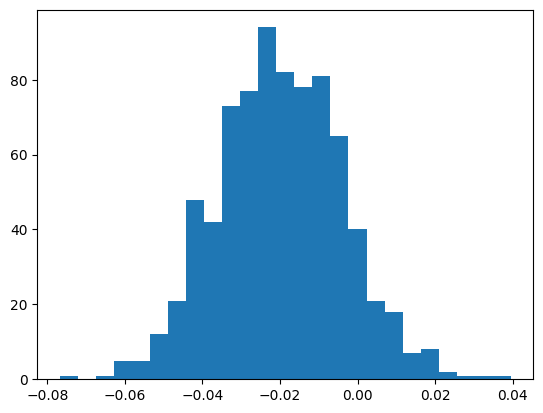

In [52]:
plt.hist(tf.reduce_mean(model_2.layers[2].weights[0].numpy(), axis=-1), bins='auto')